In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import yt
import yt.units as u
import sys
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from astropy.convolution import Gaussian2DKernel
from astropy.convolution import convolve
from scipy.interpolate import splev, splrep, interp1d, splint

In [25]:
raw_1, raw114_1, rawe_1 = np.load('data/m1.0_p10_b1.0_dens.npz'), np.load(
    'data/m1.0_p10_b1.0_P110_dens.npz'), np.load(
        'data/m1.0_p10_b1.0_e9_dens.npz')

In [11]:
def combine(raw, raw_peri):
    x_peri, E_peri = raw_peri['x'], raw_peri['y']
    xmin = np.argmin(x_peri)
    x_peri, E_peri = x_peri[xmin:], E_peri[xmin:, :]
    x, E = raw['x'], raw['y']
    xmin = np.argmin(x)
    x, E = x[xmin:], E[xmin:, :]
    E = E[x > x_peri[-1], :]
    x = x[x > x_peri[-1]]
    dat = {}
    dat['x'] = np.append(x_peri, x)
    dat['y'] = np.append(E_peri, E)
    return dat

In [6]:
def smooth_evol(raw, ax, label, lens=65):
    x = (raw['x'][:] * u.cm).in_units('Rsun').v
    y = np.log10(raw['y'][:])
    spl = splrep(x, y, s=1e-4, k=5)
    x1 = np.logspace(np.log10(x[0]), np.log10(x[-1]), 100)
    y1 = 10**splev(x1, spl)
    ax.plot(x1, y1, label=label)
    return spl, x[0]

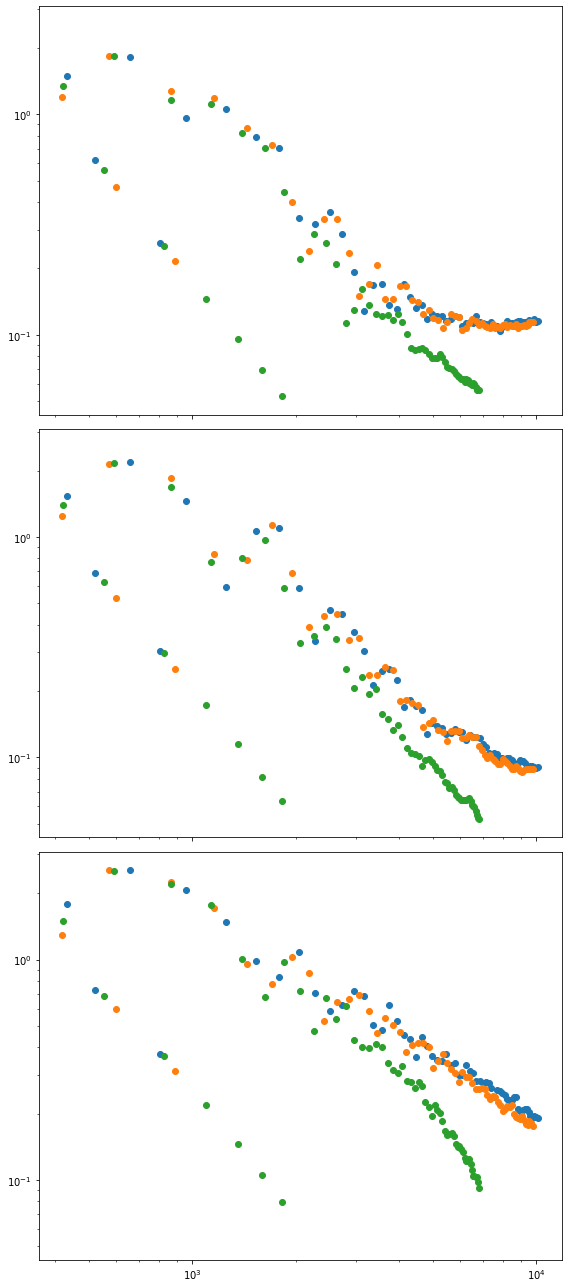

In [27]:
f, ax = plt.subplots(3, 1, figsize=(8, 18), sharex=True, sharey=True)
ax[0].scatter((raw_1['x'] * u.cm).in_units('Rsun'), raw_1['y'][0, :])
ax[0].scatter((raw114_1['x'] * u.cm).in_units('Rsun'), raw114_1['y'][0, :])
ax[0].scatter((rawe_1['x'] * u.cm).in_units('Rsun'), rawe_1['y'][0, :])
ax[1].scatter((raw_1['x'] * u.cm).in_units('Rsun'), raw_1['y'][1, :])
ax[1].scatter((raw114_1['x'] * u.cm).in_units('Rsun'), raw114_1['y'][1, :])
ax[1].scatter((rawe_1['x'] * u.cm).in_units('Rsun'), rawe_1['y'][1, :])
ax[2].scatter((raw_1['x'] * u.cm).in_units('Rsun'), raw_1['y'][2, :])
ax[2].scatter((raw114_1['x'] * u.cm).in_units('Rsun'), raw114_1['y'][2, :])
ax[2].scatter((rawe_1['x'] * u.cm).in_units('Rsun'), rawe_1['y'][2, :])
#ax[1].scatter(r, 10**(splev(r, spl1) - splev(r, spl2)))
#ax[0].set_ylim(1e-2, 3)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
f.tight_layout()

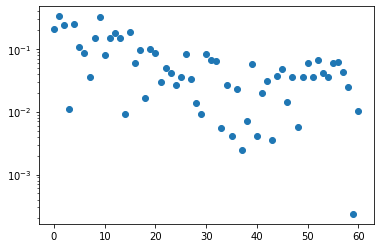

In [44]:
plt.scatter(range(len(raw_1['x'])), abs(1-raw_1['y'] / raw114_1['y'])[0, :])
#plt.scatter(range(len(raw_1['x'])), abs(1-raw_1['y'] / raw114_1['y'])[1, :])
#plt.scatter(range(len(raw_1['x'])), abs(1-raw_1['y'] / raw114_1['y'])[2, :])
plt.yscale('log')

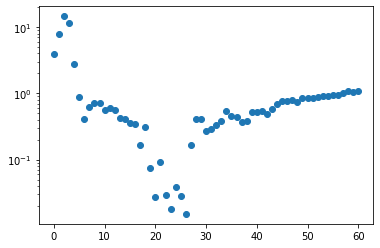

In [45]:
plt.scatter(range(len(raw_1['x'])), abs(1-raw_1['y'] / rawe_1['y'])[0, :])
#plt.scatter(range(len(raw_1['x'])), abs(1-raw_1['y'] / rawe_1['y'])[1, :])
#plt.scatter(range(len(raw_1['x'])), abs(1-raw_1['y'] / rawe_1['y'])[2, :])
plt.yscale('log')